<a href="https://colab.research.google.com/github/NishmithaJR/Data-Analytics/blob/main/Python_Exploratory_Data_Analysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("udemy_courses.csv",parse_dates=['published_timestamp'])
df.head (2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance


In [ ]:
df.dtypes

,0
course_id,int64
course_title,object
url,object
is_paid,bool
price,int64
num_subscribers,int64
num_reviews,int64
num_lectures,int64
level,object
content_duration,float64


In [ ]:
df.shape

(3678, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [ ]:
df[df.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development


In [ ]:
df=df.drop_duplicates()

In [ ]:
df[df.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


In [ ]:
df.isnull().sum()

,0
course_id,0
course_title,0
url,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0


<Axes: >

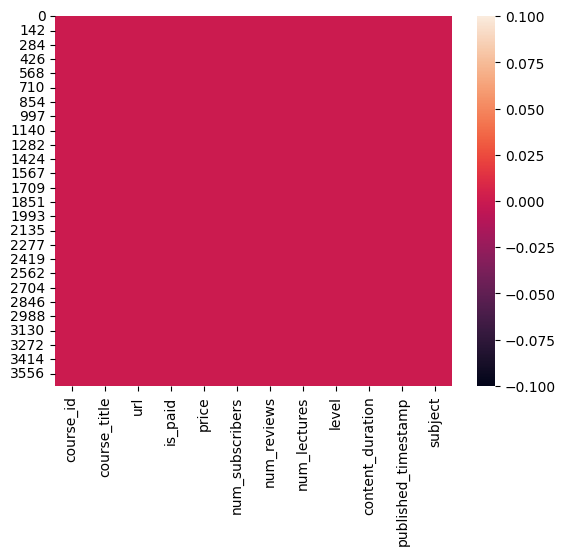

In [ ]:
# visualising null values
sns.heatmap(df.isnull())
# none of the naull values. If it would be then a lighter color would have been appeared for it.

In [ ]:
# total number of courses in each subject
df.groupby('subject') ['course_title'].count()

,course_title
subject,
Business Finance,1191
Graphic Design,602
Musical Instruments,680
Web Development,1199


In [ ]:
df['subject'].value_counts()

,count
subject,
Web Development,1199
Business Finance,1191
Musical Instruments,680
Graphic Design,602


Text(0, 0.5, 'no.of courses per subject')

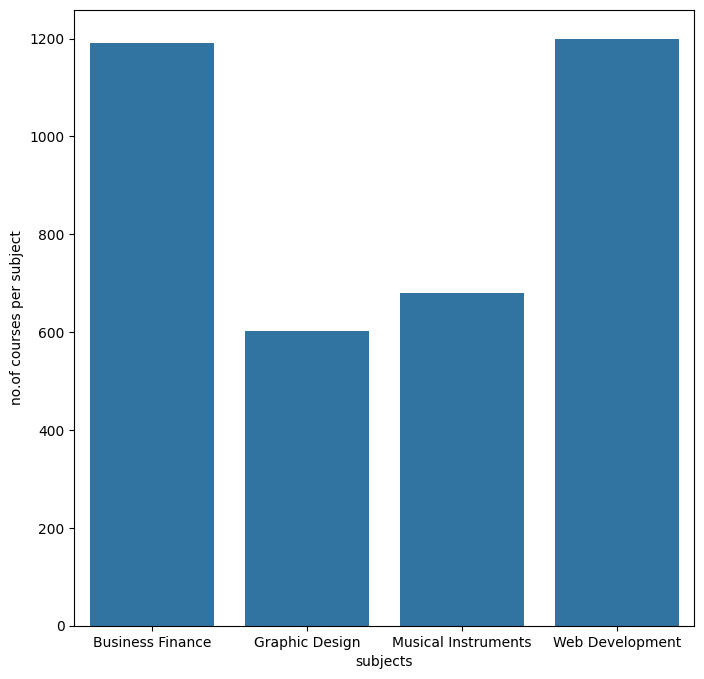

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='subject',data=df)
plt.xlabel("subjects")
plt.ylabel("no.of courses per subject")

Text(0, 0.5, 'no.of courses at each level')

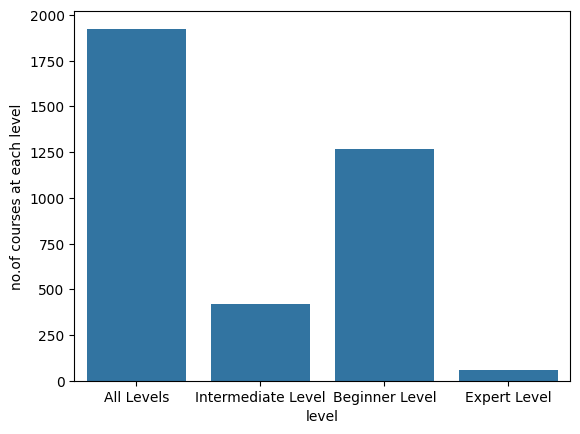

In [ ]:
# how many courses udemy providing for each level
sns.countplot(x='level',data=df)
plt.ylabel("no.of courses at each level")

In [ ]:
df['level'].value_counts()

,count
level,
All Levels,1925
Beginner Level,1268
Intermediate Level,421
Expert Level,58


In [ ]:
df['is_paid'].value_counts()

,count
is_paid,
True,3362
False,310


Text(0.5, 0, 'paid & free courses')

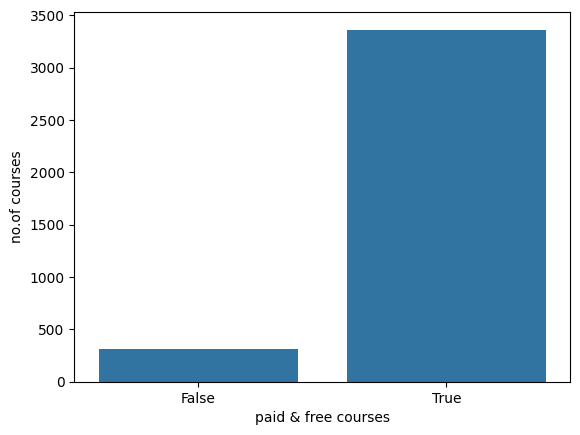

In [ ]:
sns.countplot(x='is_paid',data=df)
plt.ylabel("no.of courses")
plt.xlabel("paid & free courses")

In [ ]:
df.groupby('is_paid')['num_lectures'].sum()

,num_lectures
is_paid,
False,6639
True,140756


<Axes: xlabel='level', ylabel='num_lectures'>

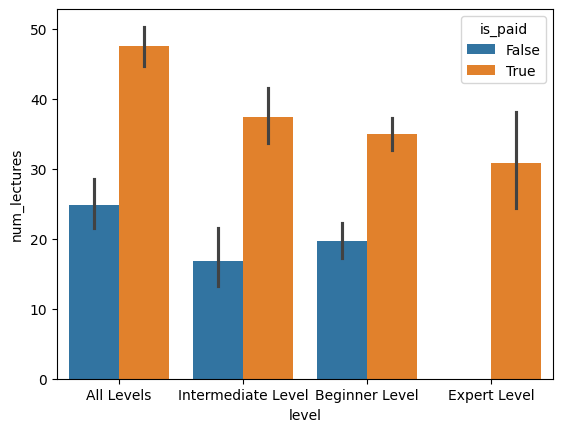

In [ ]:
sns.barplot(y='num_lectures', x='level', data=df, hue='is_paid')

In [ ]:
df.groupby('is_paid')['num_subscribers'].sum().sort_values(ascending=False)

,num_subscribers
is_paid,
True,8140310
False,3575525


<Axes: xlabel='is_paid', ylabel='num_subscribers'>

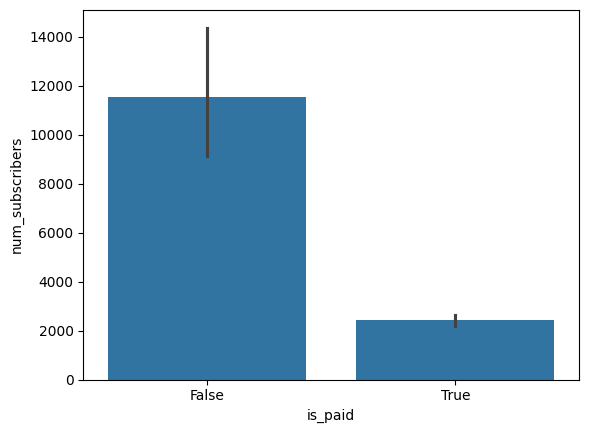

In [ ]:
sns.barplot(x='is_paid',y='num_subscribers',data=df)

In [ ]:
df['course_title'].value_counts().sort_values(ascending=False)

,count
course_title,
Creating an animated greeting card via Google Slides,3
Acoustic Blues Guitar Lessons,3
Aprende a tocar el acordeón de botones,2
Drum Lessons For Beginners,2
Introduction to Web Development,2
...,...
HTML/CSS Bootcamp,1
JavaScript High Performance,1
Node:js : Building Rest Apis with Sails.js,1


In [ ]:
df.groupby('course_title')['num_subscribers'].sum().sort_values (ascending=False).head(5)

,num_subscribers
course_title,
Learn HTML5 Programming From Scratch,268923
Coding for Entrepreneurs Basic,161029
The Web Developer Bootcamp,121584
Build Your First Website in 1 Week with HTML5 and CSS3,120291
The Complete Web Developer Course 2.0,114512


In [ ]:
# simple method
df[df['num_subscribers'].max() == df['num_subscribers']]['course_title']

,course_title
2827,Learn HTML5 Programming From Scratch


In [ ]:
df[df['course_title'] == 'Acoustic Blues Guitar Lessons']

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2062,99324,Acoustic Blues Guitar Lessons,https://www.udemy.com/finger-picking-blues-gui...,False,0,8217,109,10,Intermediate Level,1.0,2013-09-30 20:45:20+00:00,Musical Instruments
2067,112314,Acoustic Blues Guitar Lessons,https://www.udemy.com/jim-bruce-blues-guitar-l...,True,125,1284,136,40,Intermediate Level,12.5,2013-11-28 08:54:00+00:00,Musical Instruments
2158,647276,Acoustic Blues Guitar Lessons,https://www.udemy.com/acoustic-blues-guitar-le...,True,75,189,18,101,Intermediate Level,4.5,2016-01-10 21:39:42+00:00,Musical Instruments


In [ ]:
# other method
# 10 most popular courses according to no. of subscribers
top10 = df.sort_values (by='num_subscribers', ascending =False).head (10)

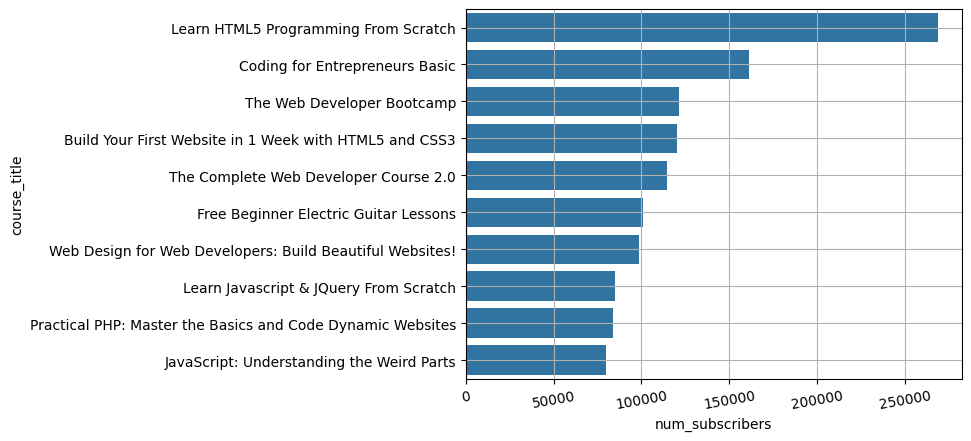

In [ ]:
sns.barplot(y='course_title',x='num_subscribers', data=top10)
plt.xticks (rotation=10)
plt.grid('True')

In [ ]:
# only showing course title of top 10 courses
df.sort_values (by='num_subscribers', ascending =False)['course_title'].head(10)

,course_title
2827,Learn HTML5 Programming From Scratch
3032,Coding for Entrepreneurs Basic
3230,The Web Developer Bootcamp
2783,Build Your First Website in 1 Week with HTML5 ...
3232,The Complete Web Developer Course 2.0
1896,Free Beginner Electric Guitar Lessons
2589,Web Design for Web Developers: Build Beautiful...
2619,Learn Javascript & JQuery From Scratch
3289,Practical PHP: Master the Basics and Code Dyna...
3247,JavaScript: Understanding the Weird Parts
